# Manual Model Selection Playground

This notebook is intended as a playground to test out different models. It allows you to load data, create a model and evaluate that model.

First, let's do the input.

In [1]:
# Correct working directory. But only once. 
if not "working_directory_corrected" in vars():
    %cd ..
    working_directory_corrected = True

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.models import Sequential  # Model type to be used
from keras import layers

from evaluation.evaluation_metrics import EvaluationMetrics
from data.dataset import Dataset

ROOT_DIR = pathlib.Path().resolve()
MODEL_ARCH_DIR = str(ROOT_DIR / pathlib.Path("data/dataset/images/model-arch")) + "/"
dataset = Dataset()

tf.compat.v1.enable_eager_execution()

c:\Users\frank\Documents\Teaching\LU\Spring2023\Machine Learning² Unit\Machine Learning Example Project


## Data Loading

Here we load our dataset and split it into training and test data. 
For this cell to work you need to run notebook data_preparation.ipynb at least once. It processes the data that is loaded here.

In [2]:
X, y = dataset.get_prepared_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

## Model Creation

Here we create the model. The below cell can be changed in order to test out different models. 

Here are some links that might come handy for this.
- [Sequential Model](https://www.tensorflow.org/guide/keras/sequential_model?hl=en)
- [Model Layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)
- [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)
- [Loses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
- [Activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
- [Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [27]:
model_name = "My Custom Model"

# Sequential Model
model = Sequential(name=model_name)
model.add(layer=layers.Input(shape= (120, 120, 3)))

# create the model
model.add(layer=layers.Conv2D(filters=10, kernel_size=(3, 3), activation="relu"))
model.add(layer=layers.MaxPooling2D(pool_size=(2, 2), padding="same"))  

model.add(layer=layers.Conv2D(filters=10, kernel_size=(3, 3), activation="relu"))
model.add(layer=layers.MaxPooling2D(pool_size=(2, 2), padding="same"))

model.add(layer=layers.Flatten())

model.add(layer=layers.Dense(units=10, activation="relu"))
model.add(layer=layers.Dense(units=18, activation="softmax"))

# See all your added layers
model.summary()

Model: "My Custom Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 118, 118, 10)      280       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 59, 59, 10)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 57, 57, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 29, 29, 10)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 8410)              0         
                                                                 
 dense_12 (Dense)            (None, 10)            

## Training

Here we train the model.
If you know what you are doing, you can also play around with different training parameters by changing the content of the cell below.

In [28]:
# Hyperparameters
training_parameters = {
    "loss": "binary_crossentropy",
    "optimizer": "adam",
    "monitored_func": "val_loss",
    "epochs": 100,
}

The following cell trains the model. It stops after the specified amount of epochs or if there has been no improvement to the test score for 5 epochs.

Epoch 1/100
21/21 [==============================] - 6s 286ms/step - loss: 0.6259 - val_loss: 0.5974
Epoch 2/100
21/21 [==============================] - 6s 291ms/step - loss: 0.5711 - val_loss: 0.5498
Epoch 3/100
21/21 [==============================] - 6s 275ms/step - loss: 0.5235 - val_loss: 0.5020
Epoch 4/100
21/21 [==============================] - 6s 279ms/step - loss: 0.4758 - val_loss: 0.4556
Epoch 5/100
21/21 [==============================] - 5s 259ms/step - loss: 0.4299 - val_loss: 0.4122
Epoch 6/100
21/21 [==============================] - 6s 269ms/step - loss: 0.3882 - val_loss: 0.3735
Epoch 7/100
21/21 [==============================] - 5s 253ms/step - loss: 0.3524 - val_loss: 0.3441
Epoch 8/100
21/21 [==============================] - 5s 249ms/step - loss: 0.3239 - val_loss: 0.3262
Epoch 9/100
21/21 [==============================] - 5s 254ms/step - loss: 0.3045 - val_loss: 0.3092
Epoch 10/100
21/21 [==============================] - 5s 256ms/step - loss: 0.2869 - val_lo

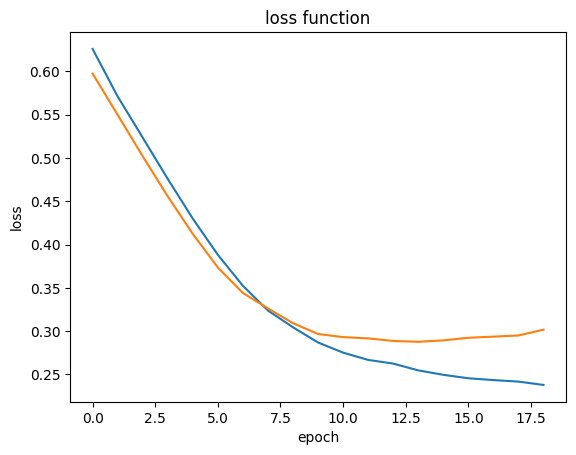

Stopped training after 19 epochs!


In [29]:
# Compilation
model.compile(loss=training_parameters["loss"], optimizer=training_parameters["optimizer"], run_eagerly=True)

# Training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor=training_parameters["monitored_func"], patience=5, restore_best_weights=True)
history = model.fit(x=X_train, y=y_train, epochs=training_parameters["epochs"], validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history["loss"], label='training loss')
plt.plot(history.history["val_loss"],label='validation loss')
plt.title("loss function")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(loc="upper right")
plt.show()

# Plot training results
print(f"Stopped training after {len(history.epoch)} epochs!")

## Evaluation

Here we evaluate the training results of our model and print out several metrics. 
Remember: we've selected the hamming score as our main score for comparison.

In [32]:
threshold = 0.1
y_pred = model.predict(x=X_test) > threshold
cnn_eval_metrics = EvaluationMetrics(y_true=y_test, y_pred=y_pred)
cnn_eval_metrics.print_evaluation_report(test_description="Convolutional Neural Network - Test Set")

6/6 [==============================] - 1s 101ms/step

Convolutional Neural Network - Test Set
- subset accuracy: 1 %
- hamming score 0.12
- f1-scores:  [0.0, 0.08, 0.11, 0.2, 0.1, 0.24, 0.25, 0.13, 0.0, 0.2, 0.0, 0.0, 0.12, 0.0, 0.14, 0.0, 0.0, 0.27]
- class accuracies:  [89, 85, 90, 80, 89, 81, 59, 67, 94, 60, 86, 98, 64, 96, 78, 91, 94, 54]
